#  CS251: Data Analysis and Visualization

## 3D Rotation matrices

Spring 2021

Oliver W. Layton and Stephanie Taylor

This notebook is designed to demonstrate 3D rotation with a completed transformation.py. It will not run without one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

In [2]:
import data
import analysis
import transformation

First, we define two plotting functions.

In [3]:
def plot_these_pairs( data, pairs ):
    """Plot each of the given pairs of features
       There is a row if len(pairs) subplots with pair[0] on the x-axis and pair[1] on the y-axis.
       data is a Data object.
       pairs is a list of pairs of headers, e.g.
          [['X,'Y'],['Y',Z']]
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(pairs), figsize=(12,4));

    for i in range(len(pairs)):
        pair = pairs[i]
        mat = data.select_data( pair )
        axes[i].plot( mat[:,0], mat[:,1], 'o' )
        axes[i].axhline(color='k')
        axes[i].axvline(color='k')
        axes[i].set_xlim( [-2,2] )
        axes[i].set_ylim( [-2,2] )
        xl = axes[i].get_xlim()
        axes[i].text( xl[1], 0, pair[0])
        yl = axes[i].get_ylim()
        axes[i].text( 0, yl[1], pair[1])

    plt.tight_layout();
    plt.show()



In [134]:
def scatter3d(data, headers, xlim, ylim, zlim ):
    '''Creates a 3D scatter plot to visualize data
    the x, y, and z axes are drawn, but not ticks
    data is a Data object
    headers in the list of headers to plot
    xlim, ylim, and zlim should be tuples indicating the limits of each axis
    '''
    if len(headers) != 3:
        print( "need 3 headers to make a 3d scatter plot")
        return
    xyz = data.select_data(headers)

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # Scatter plot of data in 3D
    ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2])
    ax.plot( xlim, [0,0], [0,0], 'k' )
    ax.plot( [0,0], ylim, [0,0], 'k' )
    ax.plot( [0,0], [0,0], zlim, 'k' )
    ax.text( xlim[1], 0, 0, 'X')
    ax.text( 0, ylim[1], 0, 'Y')
    ax.text( 0, 0, zlim[1], 'Z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    plt.show()


### Points Clustered Along X-Axis

Now, we define a Data object with 3D data that are clustered along the positive X-axis.

Then we plot them with both a 3D scatter plot and a set of 2D scatter plots, pairing up each pair of dimensions.

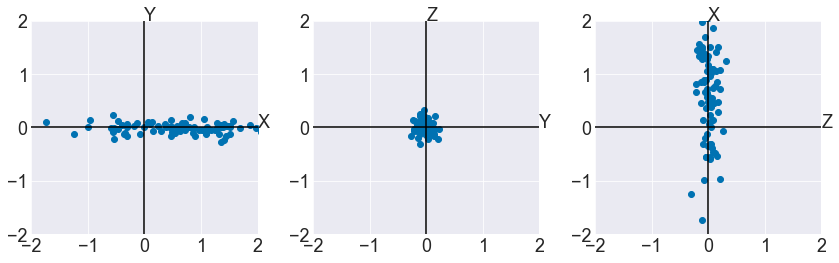

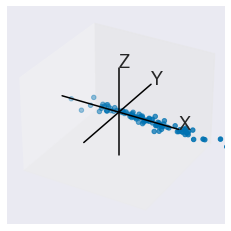

In [135]:
N = 100
dxmat = np.zeros( (N,3) )
dxmat[:,0] = 1 + np.random.randn(N)
dxmat[:,1] = 0.1*np.random.randn(N)
dxmat[:,2] = 0.1*np.random.randn(N)
dx = data.Data( data=dxmat, headers = ['X','Y','Z'], header2col={'X':0,'Y':1,'Z':2})
t = transformation.Transformation( dx )
t.project(['X','Y','Z'] )
pairs = [['X','Y'],['Y','Z'],['Z','X']]
plot_these_pairs( t.data, pairs );

scatter3d(t.data, ['X','Y','Z'], (-2,2), (-2,2), (-2,2));

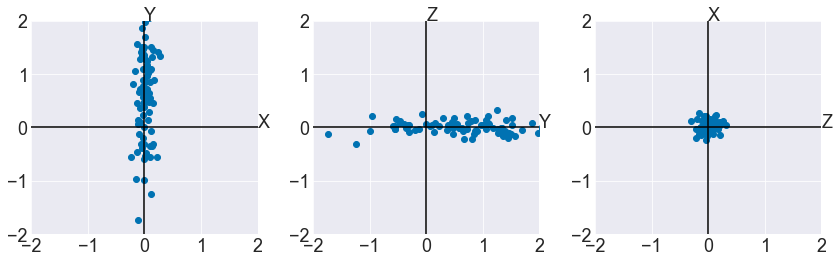

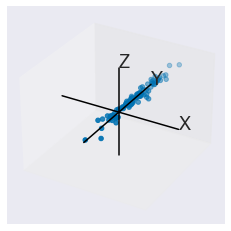

In [136]:
t.rotate_3d('Z', 90)
plot_these_pairs( t.data, pairs );
scatter3d(t.data, ['X','Y','Z'], (-2,2), (-2,2), (-2,2));

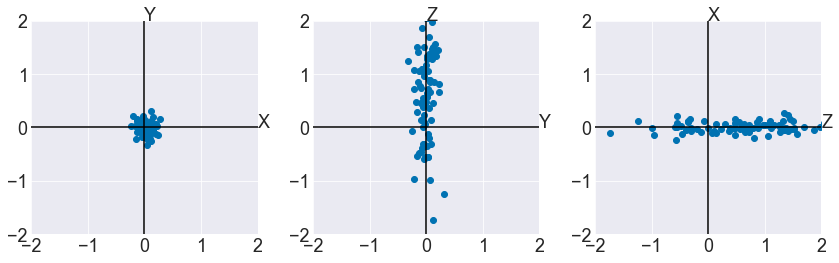

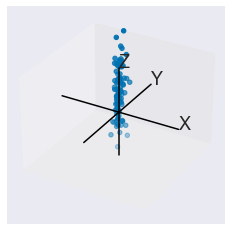

In [137]:
t.rotate_3d('X', 90)
plot_these_pairs( t.data, pairs );
scatter3d(t.data, ['X','Y','Z'], (-2,2), (-2,2), (-2,2));

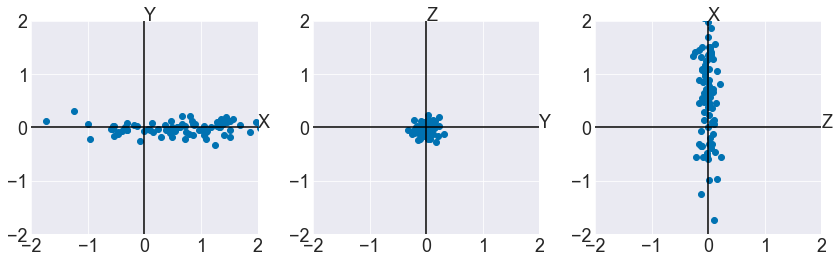

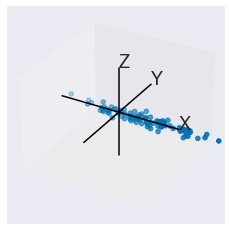

In [138]:
t.rotate_3d('Y', 90)
plot_these_pairs( t.data, pairs );
scatter3d(t.data, ['X','Y','Z'], (-2,2), (-2,2), (-2,2));

### 3D Rotation of "Robot" data

Let's practice the workflow from the project to make a pair plot of the 3 variable (X, Y, Z) robot dataset.

In [124]:
data3DObj = data.Data('data/robotData.csv')
blockTransform = transformation.Transformation(data3DObj)

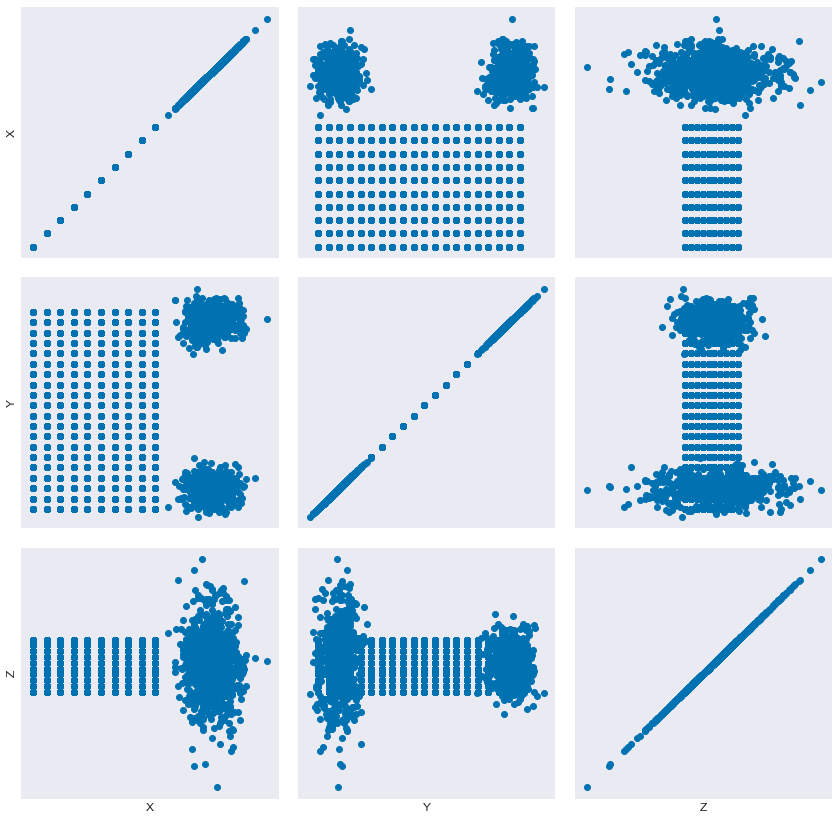

In [125]:
blockTransform.project(['X', 'Y', 'Z'])
blockTransform.pair_plot(['X', 'Y', 'Z'])
plt.show()

#### a) Rotate data so (X, Y) view shows the "upright robot face".

In other words, looking at the robot face head-on.

Let's use the project 3D scatterplot tool to help us figure out the correct rotation axis and angle to get the job done. 

Remember the right-hand rule:
- **Positive (+)** rotation means the data will move in the direction of our curled fingers when we align our right-hand thumb with the positive (+) axis we wish to rotate about.

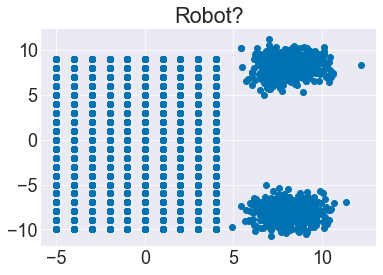

In [126]:
blockTransform.scatter('X', 'Y', 'Robot?')
plt.show()

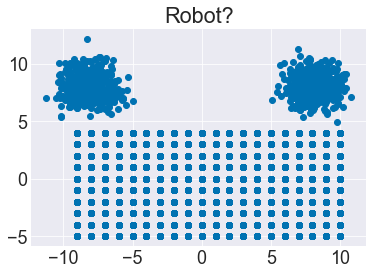

In [127]:
blockTransform.rotate_3d('Z', 90)
blockTransform.scatter('X', 'Y', 'Robot?')
plt.show()

#### b) Rotate data so (X, Y) view shows the (Y, Z) view from the pair plot.

In other words, we see the elongated blob on the left, the sphere on the right (i.e. looking at robot face from bird-eye view).

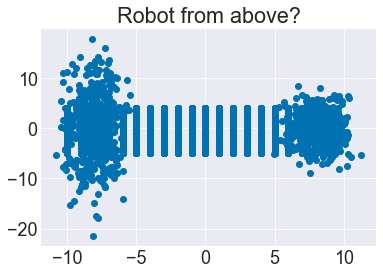

In [128]:
blockTransform.project(['X', 'Y', 'Z'])
blockTransform.rotate_3d('Z', -90)
blockTransform.rotate_3d('X', -90)

blockTransform.scatter('X', 'Y', 'Robot from above?')
plt.show()

#### c) Rotate data so (X, Y) view shows the (Z, Y) view from the pair plot.

In other words, we see the elongated blob on the left, the sphere on the right (i.e. looking at robot face from bird-eye view).

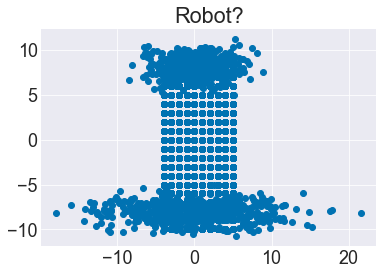

In [129]:
blockTransform.project(['X', 'Y', 'Z'])
blockTransform.rotate_3d('Y', -90)

blockTransform.scatter('X', 'Y', 'Robot?')
plt.show()